In [102]:
### K Means Clustering

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [104]:
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [105]:
Kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)

In [106]:
Kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [107]:
Kmeans.predict([[0,0], [12,3]])

array([1, 0], dtype=int32)

In [108]:
Kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [109]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0], [100, 110], [1000, 1200]])
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [110]:
# Kmeans = KMeans().fit(X) 
Kmeans = KMeans(n_clusters=4).fit(X) 

/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
Kmeans.labels_

array([0, 0, 0, 3, 3, 3, 2, 1], dtype=int32)

In [112]:
data = pd.DataFrame(X)

In [113]:
labels = pd.DataFrame(Kmeans.labels_)

In [114]:
pd.concat([data, labels], axis= 1)

,0,1,0
0,1,2,0
1,1,4,0
2,1,0,0
3,10,2,3
4,10,4,3
5,10,0,3
6,100,110,2
7,1000,1200,1


In [115]:
Kmeans.cluster_centers_

array([[1.0e+00, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+01, 2.0e+00]])

In [116]:
X,y = make_blobs(n_samples=1000, centers = 3, n_features=2, random_state=10)

In [117]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [118]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

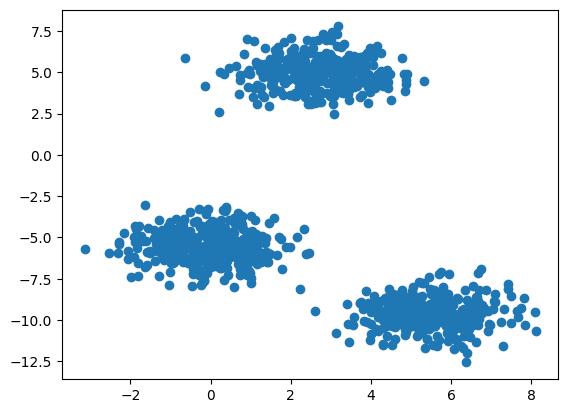

In [119]:
plt.scatter(X[:,0], X[:,1])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=20)

In [121]:
# within cluster sum of squares
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/si

/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
wcss

[6350.49923703018,
 1230.8405264123764,
 1079.6245978412417,
 939.4936398093065,
 812.5988682391182,
 714.4248512646266,
 606.9521598723832,
 530.199362489756,
 486.2199876402017]

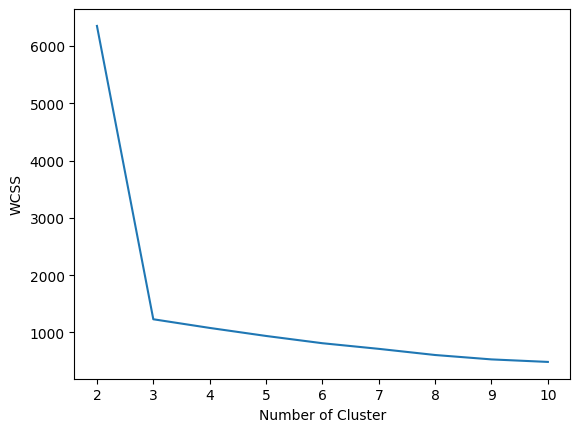

In [123]:
plt.plot(range(2,11), wcss)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

After 3 we are getting constant values that is why we will select 3 for our K. 

In [124]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [125]:
y_lables = kmeans.fit_predict(X_train)

/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


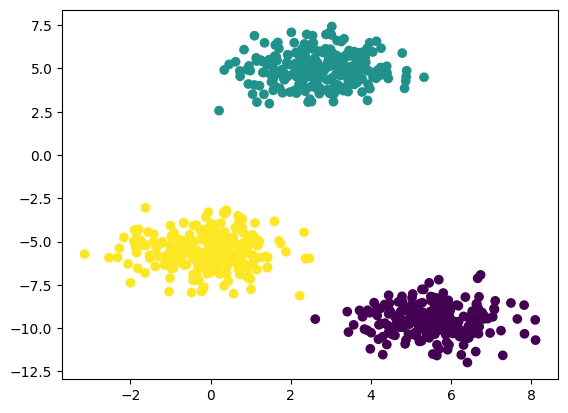

In [126]:
plt.scatter(X_train[:,0], X_train[:,1] , c = y_lables)

In [127]:
from kneed import KneeLocator

In [128]:
k = KneeLocator(range(2,11), wcss, curve= 'convex', direction = 'decreasing')

In [129]:
k.elbow

3

In [133]:
from sklearn.metrics import silhouette_score

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=20)

In [136]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

silhouette_scores

/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/omkar/.local/lib/python3.10/si

[0.7273220153669463,
 0.7835543034796946,
 0.6286078993855719,
 0.4484571512675554,
 0.312277814784807,
 0.33361981073745595,
 0.33838169404178936,
 0.35023488827465266,
 0.3369113350223782]

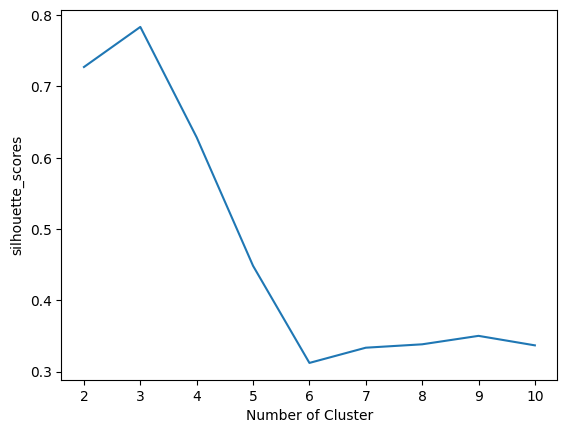

In [137]:
plt.plot(range(2,11), silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette_scores")
plt.show()

In [138]:
# for value at 3 we are getting silhouette score closer to plus one hence 
# we should 
# use k = 3

TASK : 
# you have a data set

# unsupervised+supervised=semisupervised

classification data(wafer data)

you have a multiple files 

take all the files and create a single dataframe

then you have to perform clustering(kmean,hirarchical,dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg,svc,DTC,RF, boosting classifier) on each and every cluster
and find out the best algorithm

In [ ]:
### dbscan clustering

In [ ]:
### Hierarchial clustering